In [3]:
from matplotlib import font_manager as fm, pyplot as plt, rcParams as rcp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly import express as px, graph_objects as go

In [4]:
# Fonts for running locally
fm.fontManager.addfont('/Library/Fonts/Terminess (TTF) Nerd Font Complete.ttf')

rcp['font.family'] = 'TerminessTTF Nerd Font'
rcp.update({'font.size': 13})

In [5]:
mcu = pd.DataFrame(pd.read_csv('./mcu_box_office.csv'))
mcu.columns = ['Film', 'Phase', 'Release Date', 'Critical Reception', 'Audience Reception', 'Length', 'Budget', 'Opening Weekend Gross', 'Domestic Gross', 'Worldwide Gross']

mcu

,Film,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
5,The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
6,Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
7,Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
8,Captain America: The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"
9,Guardians of the Galaxy,2,8/1/2014,92,92,121,"170,000,000","94,320,883","333,714,112","770,882,395"


In [6]:
mcu.at[4,'Film']='Captain America'
mcu.at[8,'Film']='The Winter Soldier'
mcu.at[10,'Film']='Age of Ultron'
mcu.at[12,'Film']='Civil War'
mcu.at[18,'Film']='Infinity War'
mcu.at[21,'Film']='Endgame'
mcu.at[24,'Film']='Shang-Chi'

mcu

,Film,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
5,The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
6,Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
7,Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
8,The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"
9,Guardians of the Galaxy,2,8/1/2014,92,92,121,"170,000,000","94,320,883","333,714,112","770,882,395"


In [7]:
mcu=mcu.set_index('Film')
mcu

,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
Captain America,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"


In [8]:
mcu['Budget'] = mcu['Budget'].replace(',','', regex=True).astype('int')*0.000001
mcu['Opening Weekend Gross'] = mcu['Opening Weekend Gross'].replace(',','', regex=True).astype('int')*0.000001
mcu['Domestic Gross'] = mcu['Domestic Gross'].replace(',','', regex=True).astype('int')*0.000001
mcu['Worldwide Gross'] = mcu['Worldwide Gross'].replace(',','', regex=True).astype('int')*0.000001

mcu['Budget'] = mcu['Budget'].round(decimals=2)
mcu['Opening Weekend Gross'] = mcu['Opening Weekend Gross'].round(decimals=2)
mcu['Domestic Gross'] = mcu['Domestic Gross'].round(decimals=2)
mcu['Worldwide Gross'] = mcu['Worldwide Gross'].round(decimals=2)

mcu


,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Iron Man,1,5/2/2008,94,91,126,186.0,102.12,318.60,585.17
The Incredible Hulk,1,6/13/2008,67,70,112,137.5,55.41,134.81,265.57
Iron Man 2,1,5/7/2010,72,71,124,170.0,128.12,312.43,621.16
Thor,1,5/6/2011,77,76,113,150.0,65.72,181.03,449.33
Captain America,1,7/22/2011,79,75,124,140.0,65.06,176.65,370.57
The Avengers,1,5/4/2012,91,91,143,225.0,207.44,623.36,1515.10
Iron Man 3,2,5/3/2013,79,78,130,200.0,174.14,408.99,1215.39
Thor: The Dark World,2,11/8/2013,66,75,111,150.0,85.74,206.36,644.60
The Winter Soldier,2,4/4/2014,90,92,135,170.0,95.02,259.75,714.40


In [9]:
def reception(x):
    phaseDf = mcu.loc[mcu['Phase'] == x]
    film = phaseDf.index.values
    crit = phaseDf['Critical Reception']
    aud = phaseDf['Audience Reception']
    x_axis = np.arange(len(film))
    title = 'Reception of Phase '+str(x)
    plotWidth = film.size * 3

    plt.figure(figsize=(plotWidth,10))
    plt.bar(x_axis-0.2, crit, 0.4, label = 'Critical')
    plt.bar(x_axis+0.2, aud, 0.4, label = 'Audience')

    plt.xticks(x_axis, film)
    plt.xlabel('Films')
    plt.ylabel('Reception')
    plt.yticks(range(0, 100, 10))
    plt.title(title)
    plt.legend()
    plt.savefig('./Graphs/Reception/phase'+str(x)+'reception.png')
    plt.show()

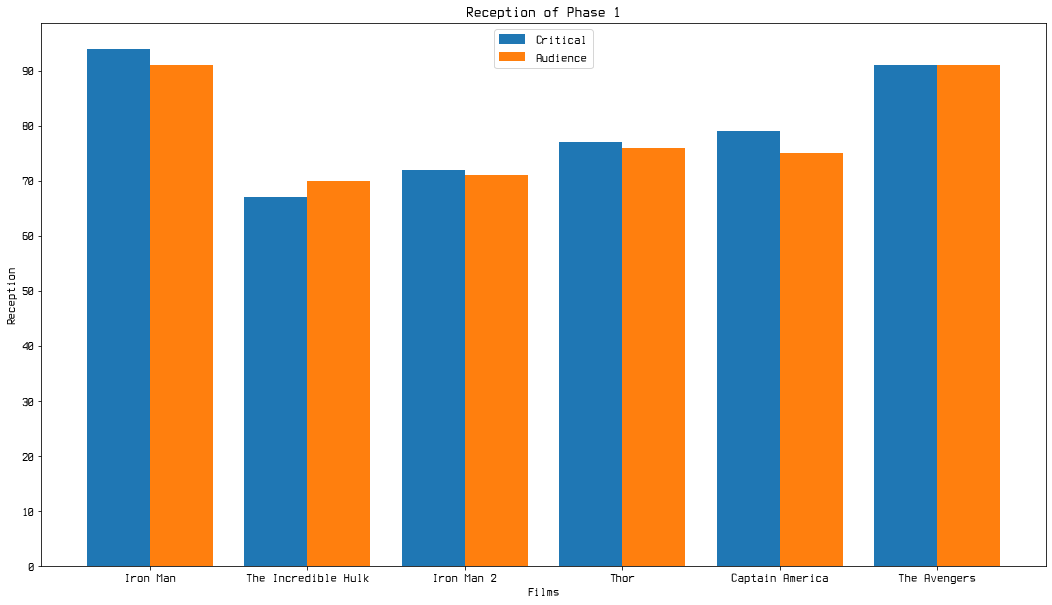

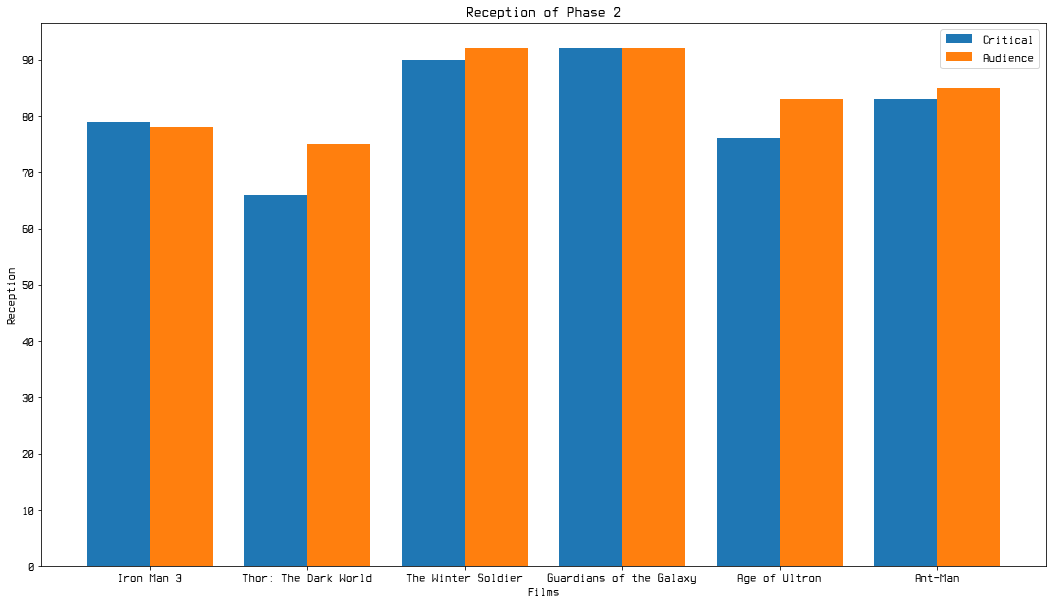

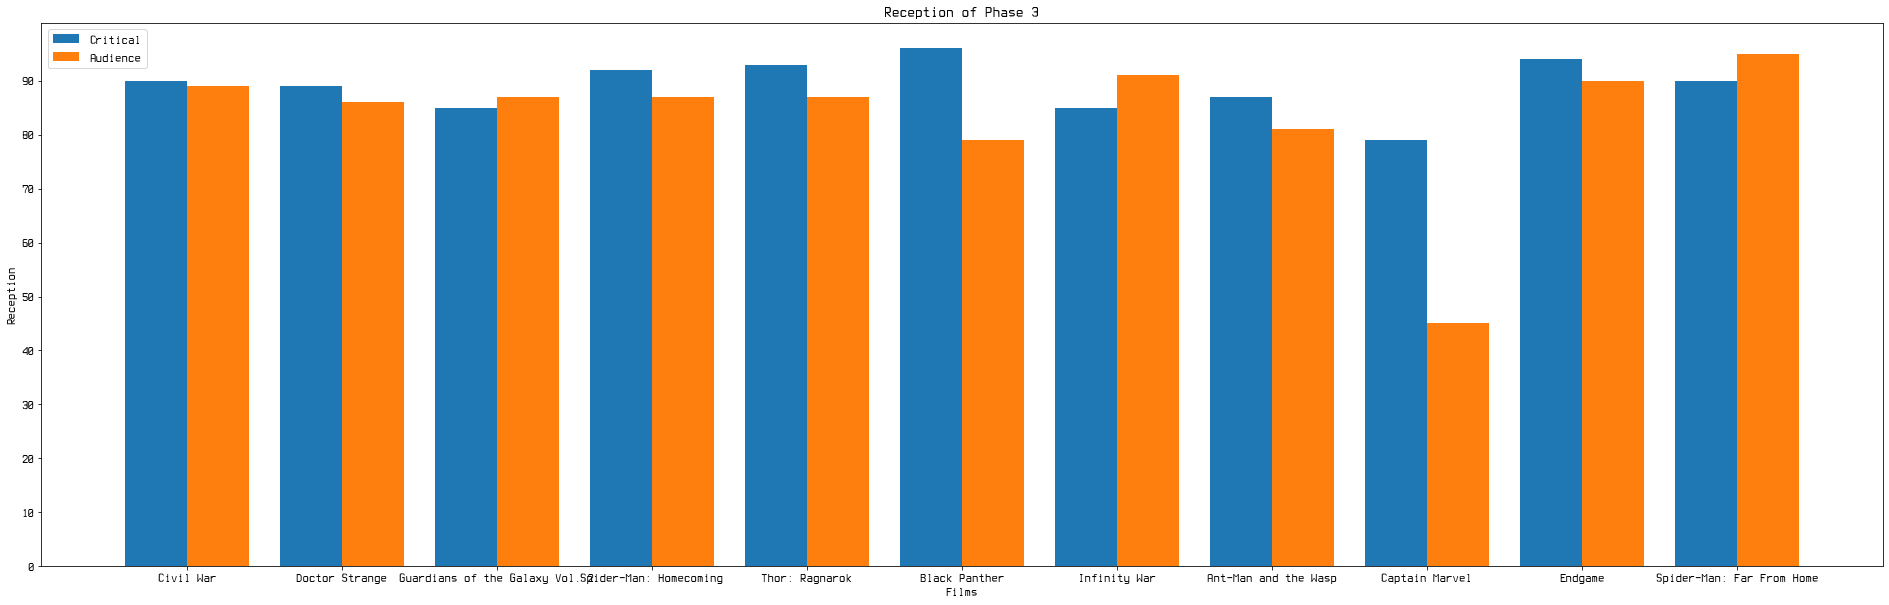

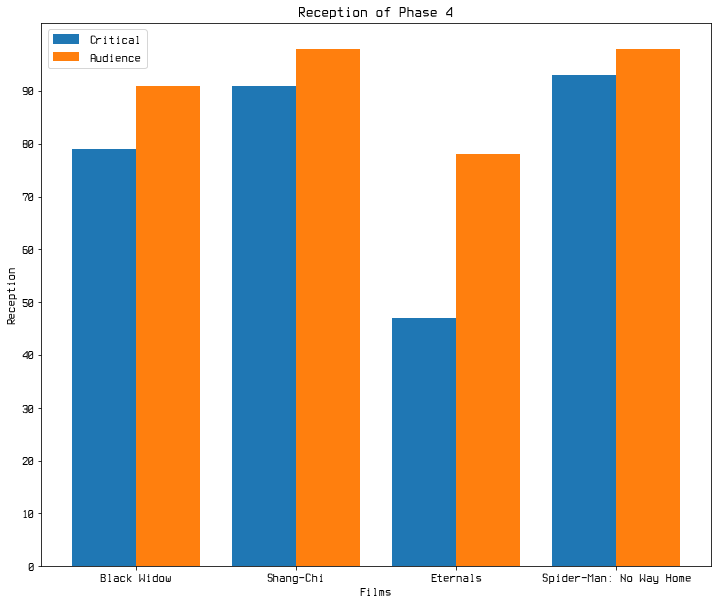

In [10]:
for x in np.unique([x for x in mcu['Phase']]):
    reception(x)

In [11]:
def boxoffice(x):
    phaseDf = mcu.loc[mcu['Phase'] == x]
    film = phaseDf.index.values
    budget = phaseDf['Budget']
    domestic = phaseDf['Domestic Gross']
    worldwide = phaseDf['Worldwide Gross']
    foreign = worldwide - domestic
    x_axis = np.arange(len(film))
    plotWidth = film.size * 3


    plt.figure(figsize=(plotWidth,10))

    plt.bar(x_axis, domestic, 0.5, label = 'Domestic')
    plt.bar(x_axis, foreign, 0.5, label = 'Foreign', bottom=domestic)
    plt.bar(x_axis+0.375, budget, 0.25, label = 'Budget')


    plt.xticks(x_axis, film)
    plt.xlabel('Films')
    plt.ylabel("Box Office Revenue in Millions (USD)")
    plt.yticks(np.arange(0, max(worldwide + 100), 100))
    plt.title('Box Office Results for Phase '+str(x))
    plt.legend()
    plt.savefig('./Graphs/BoxOffice/phase'+str(x)+'boxoffice.png')
    plt.show()

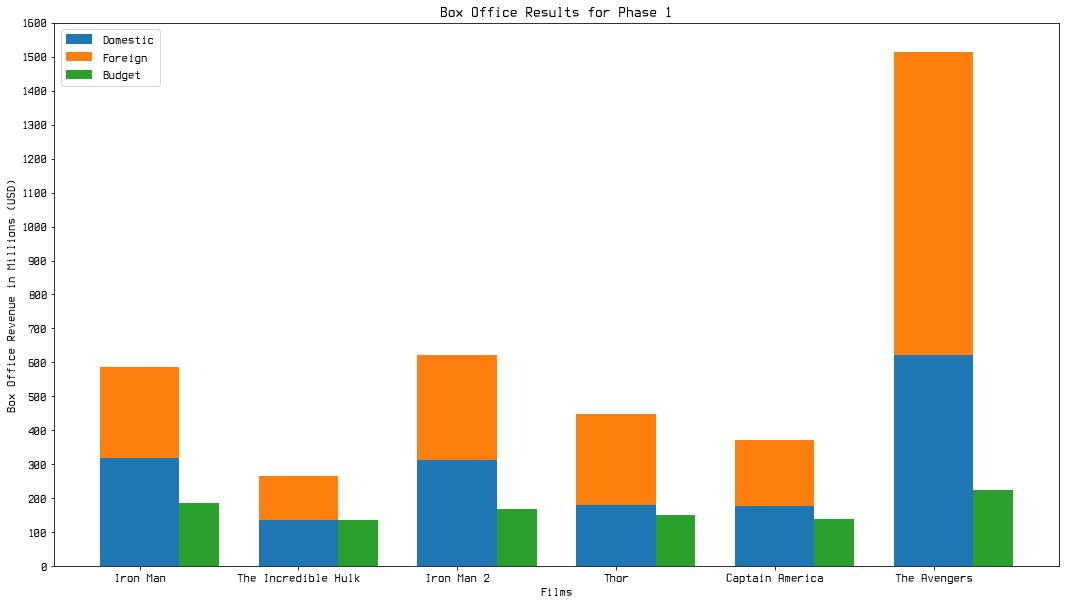

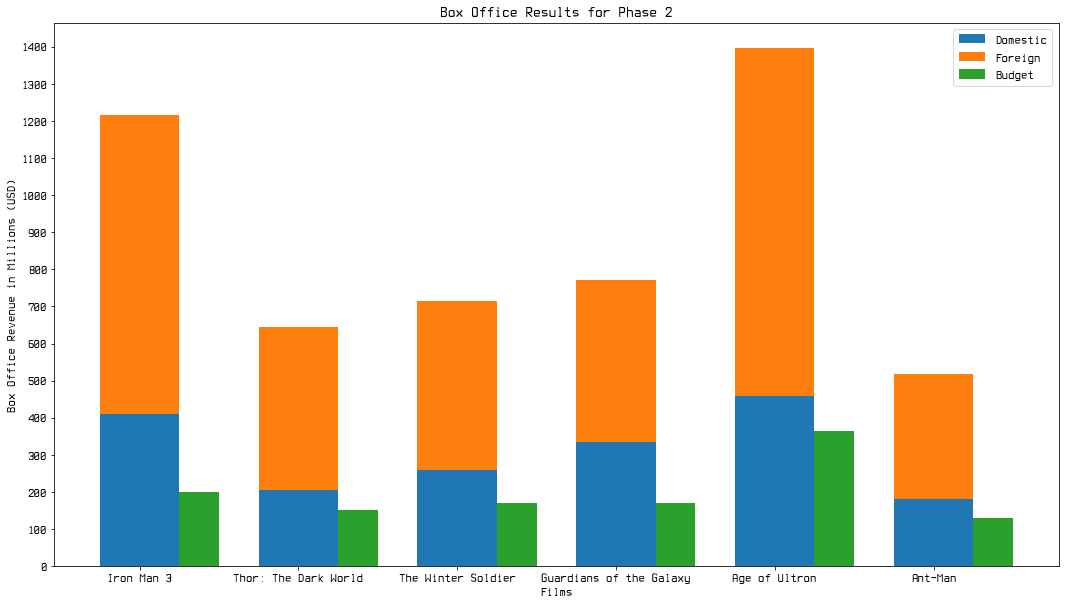

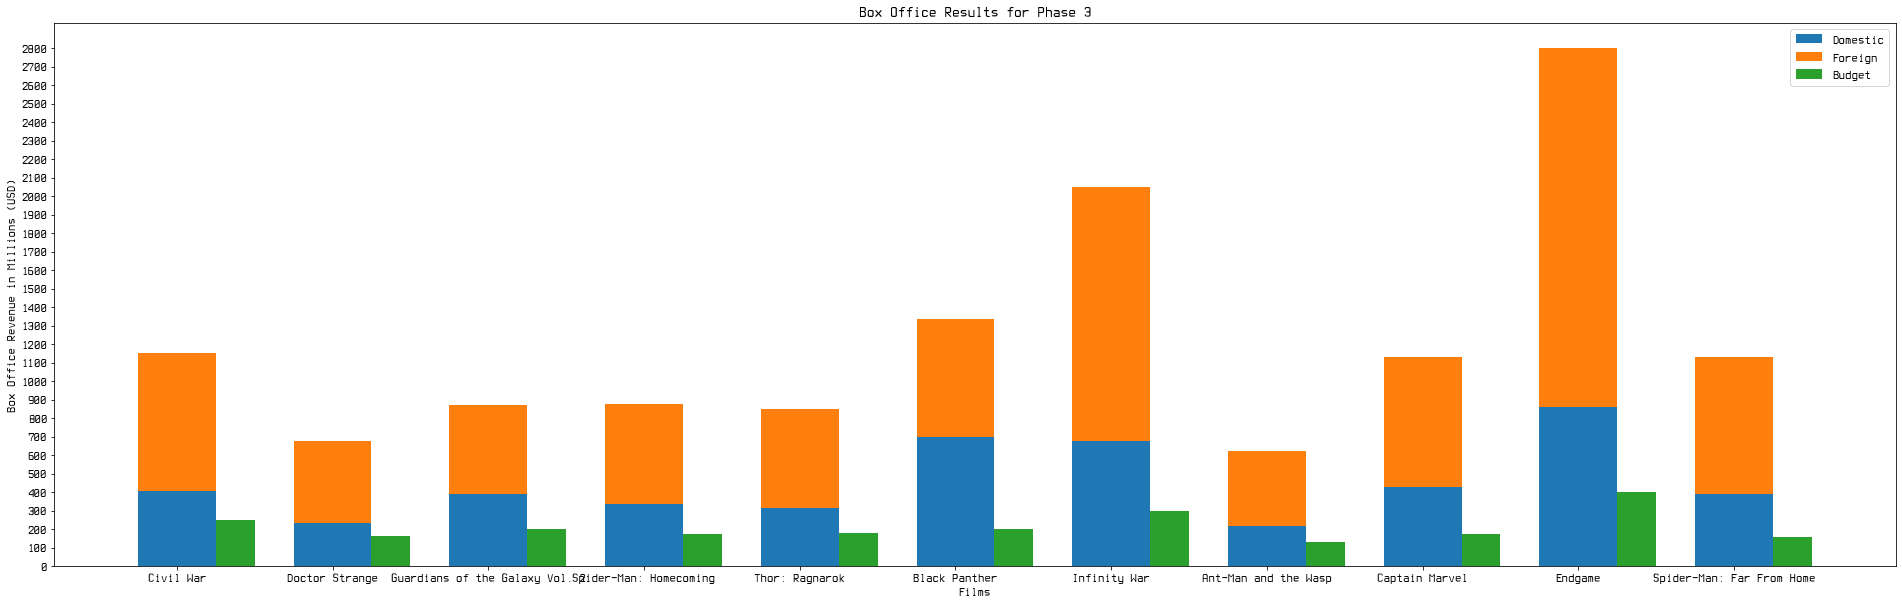

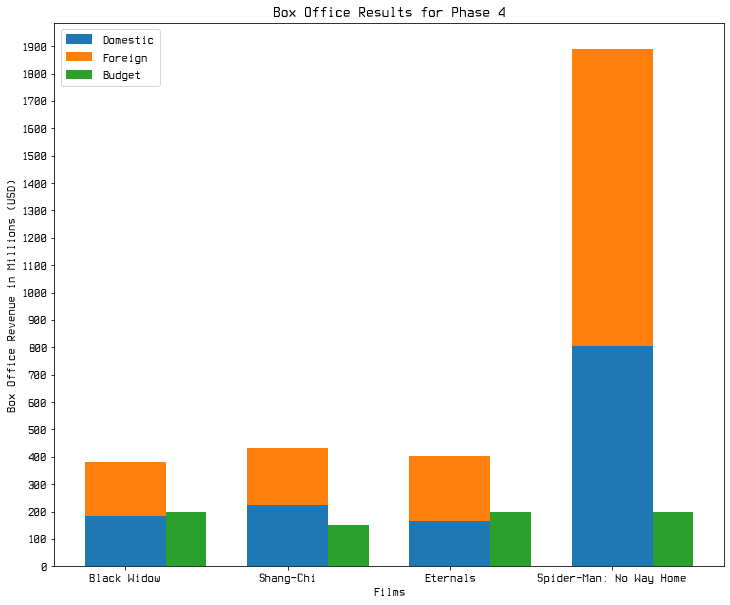

In [12]:
for x in np.unique([x for x in mcu['Phase']]):
    boxoffice(x)

In [13]:
def reception_finances(x):
    phaseDf = mcu.loc[mcu['Phase'] == x]
    film = phaseDf.index.values
    budget = phaseDf['Budget']
    domestic = phaseDf['Domestic Gross']
    worldwide = phaseDf['Worldwide Gross']
    foreign = worldwide - domestic

    crit = phaseDf['Critical Reception']
    aud = phaseDf['Audience Reception']

    x_axis = np.arange(len(film))
    plotWidth = film.size * 3


    plt.figure(figsize=(plotWidth,10))
    plt.ylim(0,max(worldwide)+100)

    plt.bar(x_axis, domestic, 0.5, label = 'Domestic')
    plt.bar(x_axis, foreign, 0.5, label = 'Foreign', bottom=domestic)
    plt.bar(x_axis+0.375, budget, 0.25, label = 'Budget')
    plt.ylabel('Box Office Returns in Millions (USD)')

    axis2 = plt.twinx()
    axis2.plot(x_axis, crit, color='red')
    axis2.plot(x_axis, aud, color='blue')
    axis2.set_ylim(0,100)
    axis2.set_ylabel('Reception per Rotten Tomatoes in %')


    # ---------- #
    plt.xticks(x_axis, film)
    plt.savefig('./Graphs/BoxOfficeWithReception/phase'+str(x)+'boxoffice.png')
    plt.show()

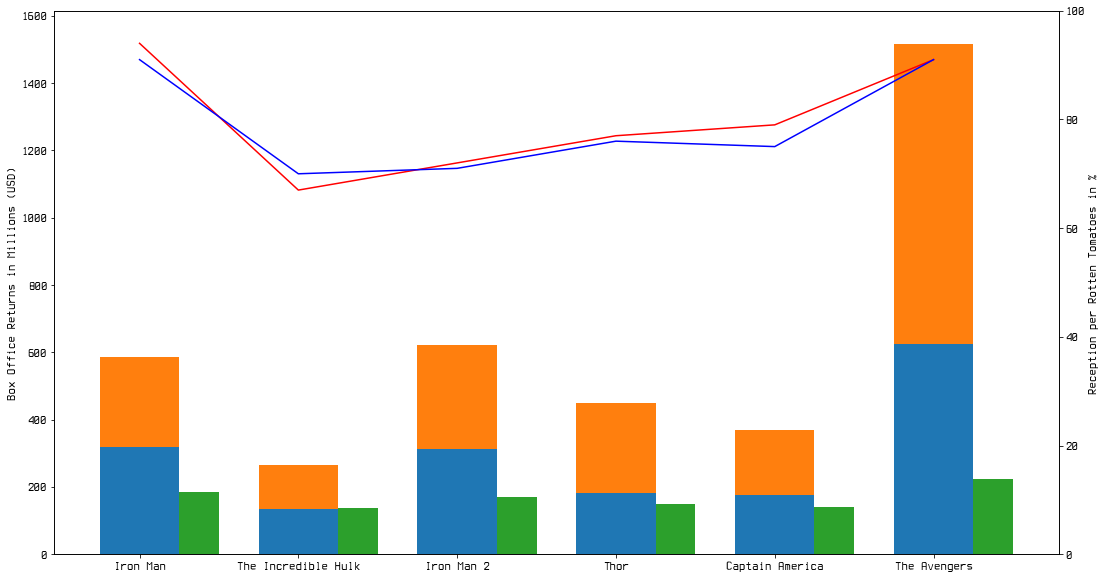

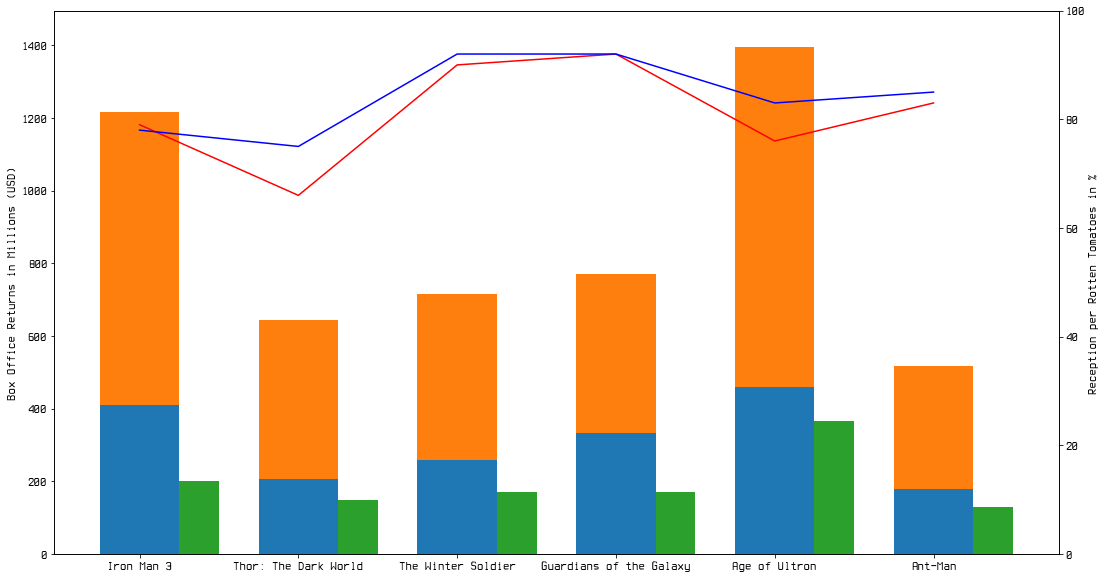

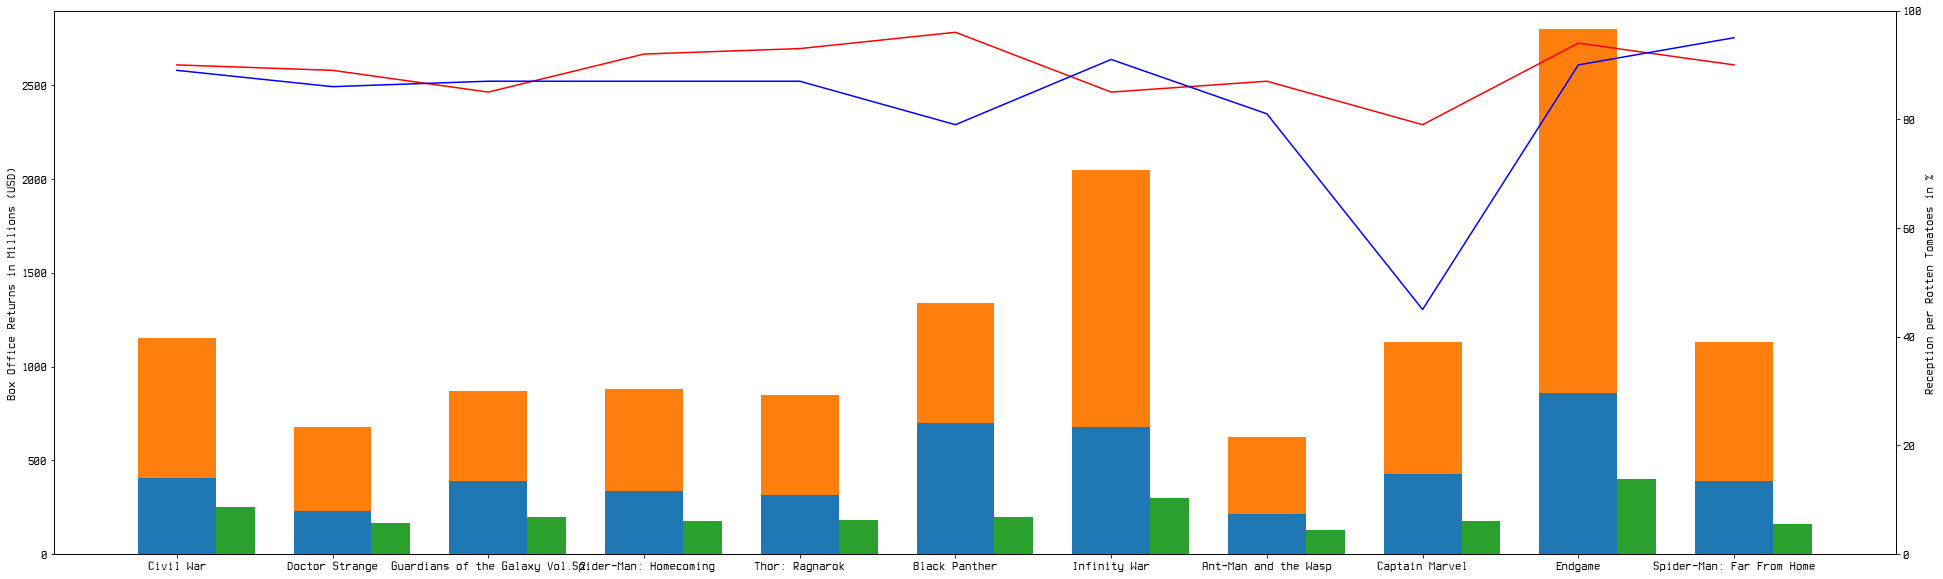

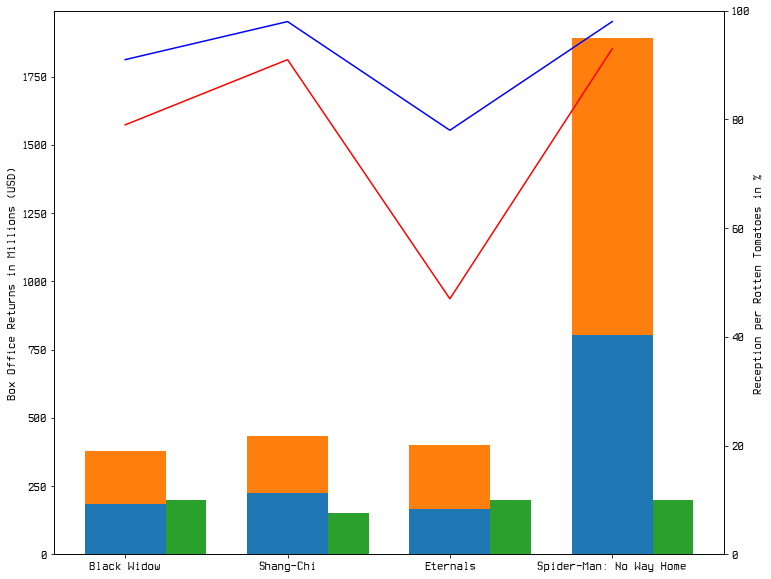

In [14]:
for x in np.unique([x for x in mcu['Phase']]):
    reception_finances(x)

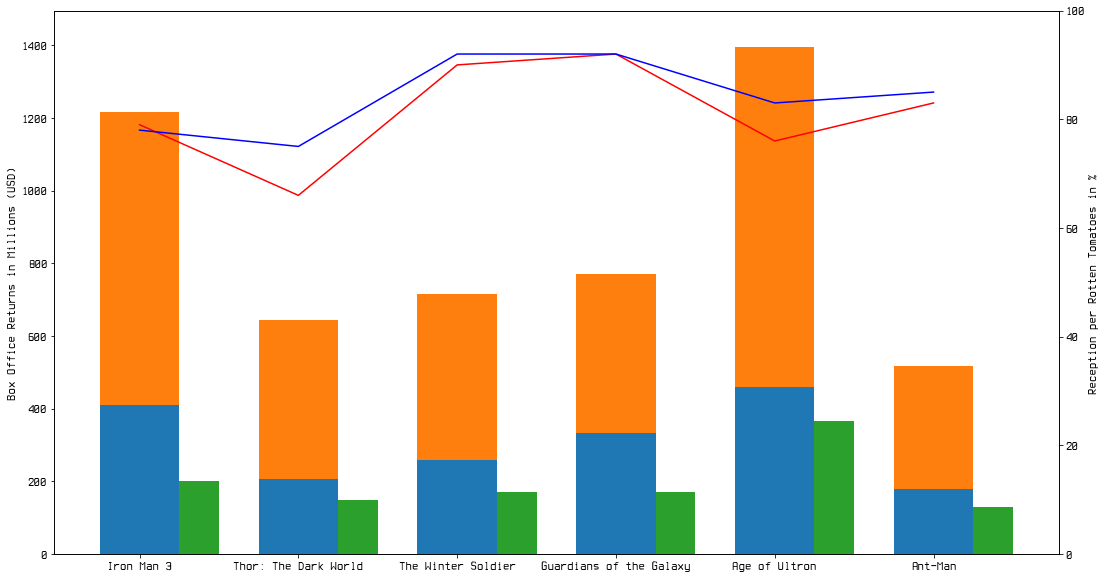

In [15]:
reception_finances(2)

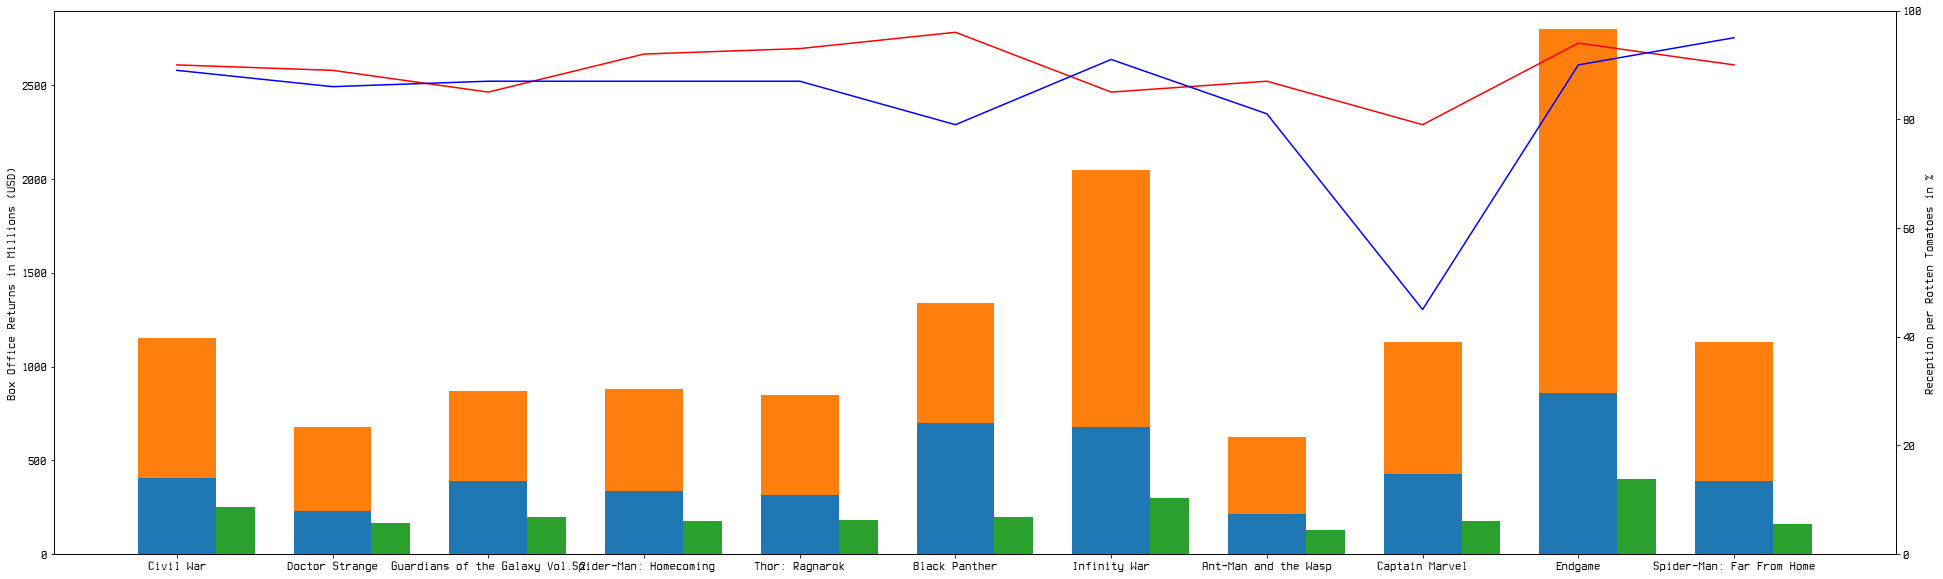

In [16]:
reception_finances(3)

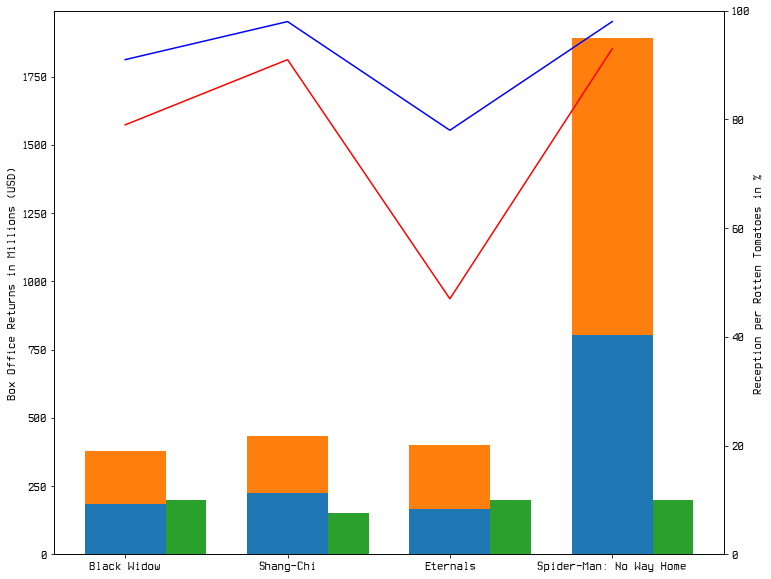

In [17]:
reception_finances(4)

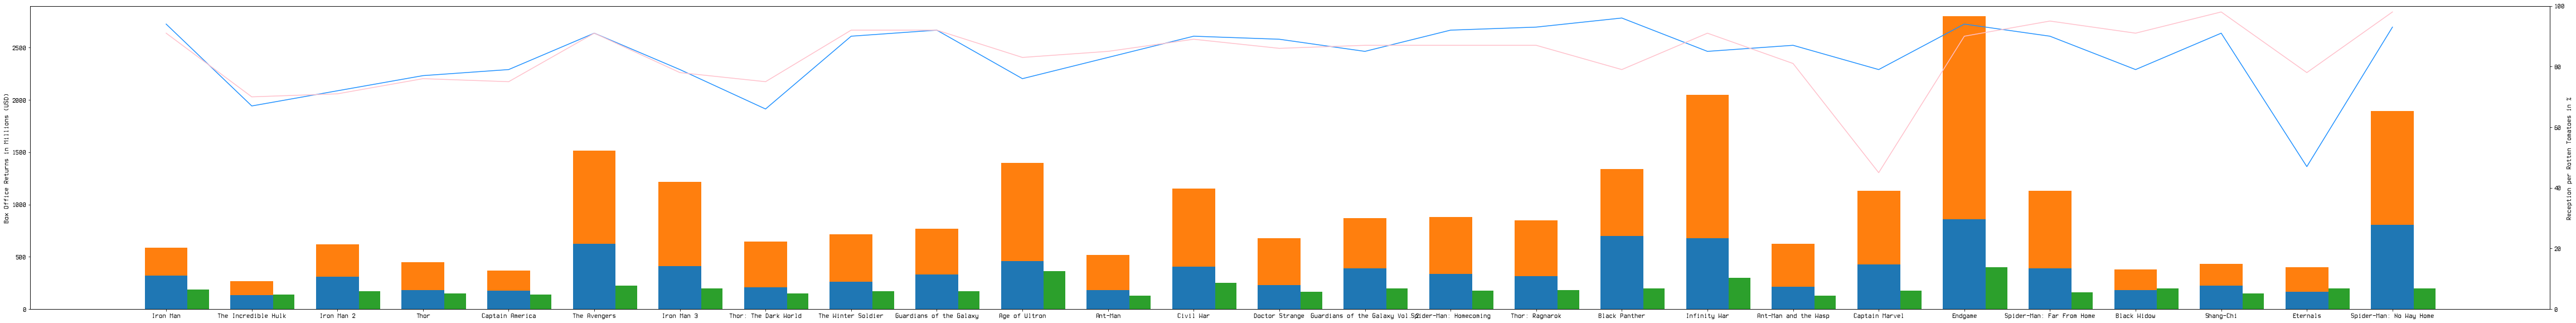

In [19]:
phaseDf = mcu
film = phaseDf.index.values
budget = phaseDf['Budget']
domestic = phaseDf['Domestic Gross']
worldwide = phaseDf['Worldwide Gross']
foreign = worldwide - domestic

crit = phaseDf['Critical Reception']
aud = phaseDf['Audience Reception']

x_axis = np.arange(len(film))
plotWidth = film.size * 3

plt.figure(figsize=(plotWidth, 10))
plt.ylim(0, max(worldwide) + 100)

plt.bar(x_axis, domestic, 0.5, label='Domestic')
plt.bar(x_axis, foreign, 0.5, label='Foreign', bottom=domestic)
plt.bar(x_axis + 0.375, budget, 0.25, label='Budget')
plt.ylabel('Box Office Returns in Millions (USD)')

axis2 = plt.twinx()
axis2.plot(x_axis, crit, color='dodgerblue')
axis2.plot(x_axis, aud, color='pink')
axis2.set_ylim(0, 100)
axis2.set_ylabel('Reception per Rotten Tomatoes in %')

# ---------- #
plt.xticks(x_axis, film)
plt.savefig('./Graphs/BoxOfficeWithReception/mcuboxofficeandreception.png')
plt.show()